## Skoltech
## Intro to data science, fall 2021
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSfAQzhQGmdCYLtaeeaAn2mgNut5HO4U6l3G1KUbBO0qDtA7FA/viewform

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza:https://piazza.com/class/ku068l4dg0068n

## Dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

**People**

-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if customer complained in the last 2 years, 0 otherwise


**Products**

-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Behavior**

-   NumWebPurchases: Number of purchases made through the company’s web site
-   NumCatalogPurchases: Number of purchases made using a catalogue
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to company’s web site in the last month
-   NumDealsPurchases: Number of purchases made with a discount


#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inlines
import seaborn as sns
sns.set()

#### Read the data

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

## 1. Data exploration

Let's take a closer look at the data.

### Q1.1

#### How many columns in the dataset?

In [3]:
len(df.columns)

22

### Q1.2

#### How many unique marital statuses are there?

In [4]:
df.Marital_Status.nunique()

8

### Q1.3
#### What is the average age, if we assume now it is 2021? E.g. if we would have two people born in 2001 and 1999, the average age would be 21. Please answer with an integer.

In [5]:
current_year = 2021
(current_year - df.Year_Birth).mean()

46.19419642857143

### Q1.4
#### There are some columns related to spendings by category, they are starting with 'Mnt': MntWines, MntFruits, etc. In which category people spent the most on average?

In [41]:
df.filter(regex=r'mnt(?i)').describe().loc['mean'].sort_values(ascending=False).index[0]

'MntWines'

### Q1.5

There are columns describing how customers make their orders, these columns start with num, e.g. 'NumDealsPurchases',
 or 'NumWebPurchases'. Build a histogram for the number of web visits (NumWebVisitsMonth). What is the 'most popular' number of visits, i.e. what number of visits encounters most often in the column?

In [78]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

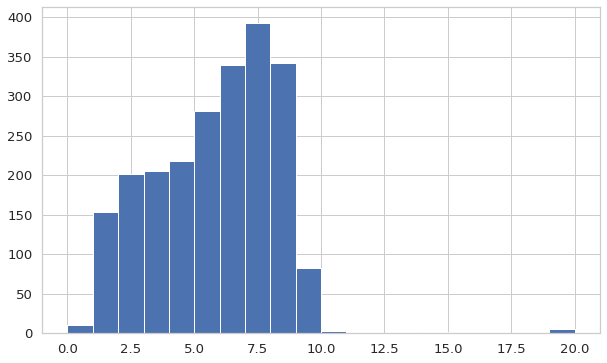

In [79]:
plt.figure(figsize=(10, 6))
df.NumWebVisitsMonth.hist(bins=20);

In [80]:
df.NumWebVisitsMonth.mode().item()

7

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for all the 'Num..' columns with 'AcceptedCmp' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how customers with different behavior patterns react to the marketing proposals. Note, to use the column as hue, it should be passed with the rest of the columns; also you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) The people, who don't visit web site don't buy with a discount **False**
- (b) All the people who often visit the website buy a lot online **False**
- (c) People, who buy with a discount, much more often accept marketing campaign **False**
- (d) There is not any clear dependency between web visits and the number of catalog purchases **True**

In [93]:
num_data = df.filter(regex=r'num|AcceptedCmp(?i)')

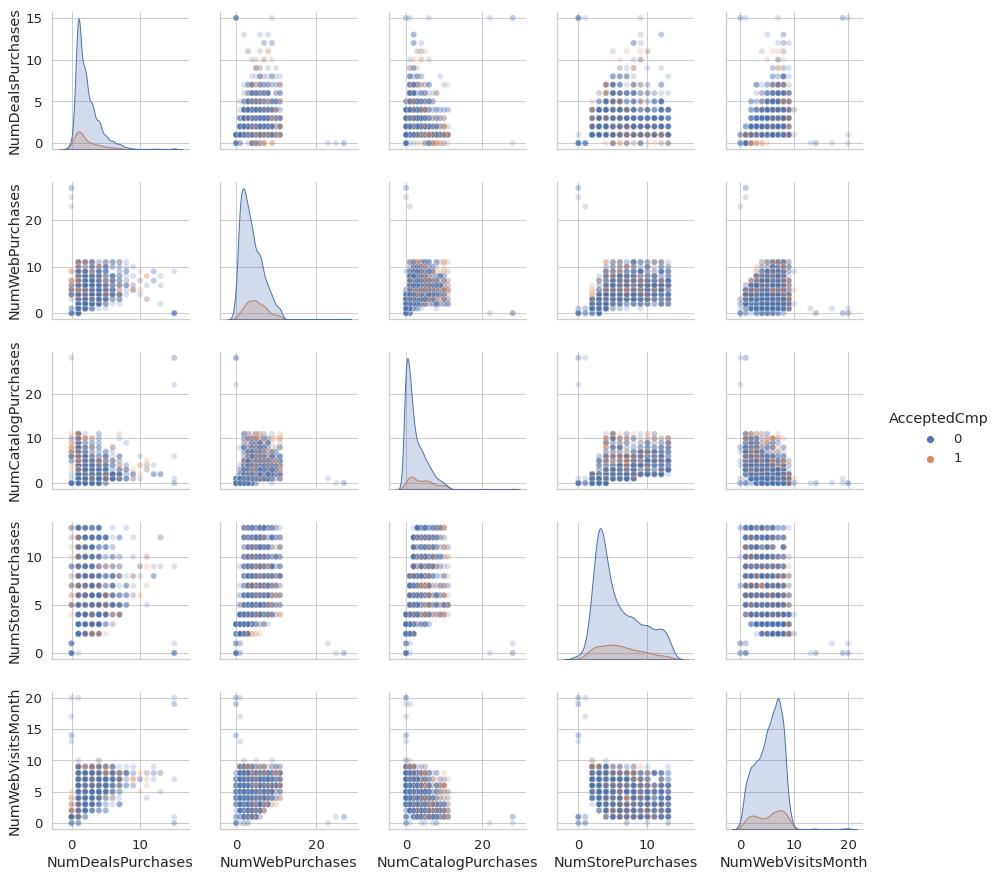

In [96]:
sns.pairplot(data=num_data, hue='AcceptedCmp', kind='scatter', plot_kws=dict(alpha=0.2));

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for teen at home ('Teenhome') and kids at home ('Kidhome'). How many customers have 2 kids and a single teenager?

In [120]:
pd.crosstab(df.Teenhome, df.Kidhome)

Kidhome,0,1,2
Teenhome,,,
0,638,503,17
1,625,374,31
2,30,22,0


31 customers have 2 kids and a single teenage

### Q1.8
There is a 'Dt_Customer' column with a customer registration date. In which month there were a maximum number of registrations? Answer with the name, i.e. 'January'. Hint: you probably want to convert the column to datetime from string.

In [122]:
df

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,...,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,...,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,...,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,...,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,...,15,5,5,3,6,5,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1973,Graduation,Married,0,1,2019-06-13,46,709,43,182,...,247,2,9,3,4,5,0,3,11,0
4001,1952,PhD,Together,2,1,2020-10-06,56,406,0,30,...,8,7,8,2,5,7,0,3,11,0
7270,1987,Graduation,Divorced,0,0,2020-01-25,91,908,48,217,...,24,1,2,3,13,6,0,3,11,0


In [146]:
import datetime

In [145]:
month_series = pd.Series(pd.DatetimeIndex(df.Dt_Customer).month)
month_number = month_series.mode().item()
month_number

8

In [148]:
datetime_object = datetime.datetime.strptime(str(month_number), "%m")
month_name = datetime_object.strftime("%B")
print(month_name)

August


## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that has the same value for all the people and they don't have a description in the sections above. Let's drop them. As an answer, write the names of these columns divided by a comma.

In [154]:
same_value_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        same_value_cols.append(col)

In [155]:
same_value_cols

['Z_CostContact', 'Z_Revenue']

In [159]:
df.drop(same_value_cols, axis=1, inplace=True)

### Q2.2
As we could see before, there are some strange rare marital statuses. We going to leave only three options - 'Married', 'Together' and 'Single'. All other options should be changed to 'Single'. How many people are now in this category?

In [226]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [227]:
def clear_marital_status(x):
    if x == 'Single' or x == 'Together' or x == 'Married':
        return x
    else:
        return 'Single'

In [228]:
df['Marital_Status'] = df.Marital_Status.apply(clear_marital_status)

In [229]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married'], dtype=object)

In [232]:
(df.Marital_Status.values == 'Single').sum()

796

### Q2.3

Now it's time to talk about the task for today. Our big retail company "Y6" want to launch a marketing campaign, but we want to make the marketing proposal only to people, who would accept it with the high probability. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'AcceptedCmp' column) and data (the rest of the columns). How many positive labels are there in target?


In [241]:
X = df.loc[:, df.columns != 'AcceptedCmp']
y = df['AcceptedCmp']

In [245]:
y.sum()

334

### Q2.4

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 42 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

In [259]:
y_test.sum()

100

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, and classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form, e.g. `Dt_Customer` as a date or `Education` as categorical, so let's make a copy of x with the following columns for the section:

'Year_Birth', 'Kidhome',
'Teenhome',  'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

### Q3.3

Build a random forest classifier. What is the f1_score for the model?

### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. What is the f1 score for the model trained on the full train dataset with this regularization?

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. 

What is the maximum value of MntWines now in the test set?

### Q4.2
We have two categorical columns - education and marital status. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Education' and 'Marital_Status' columns.

How many columns do we have now?

### Q4.3 
We have a datetime column - customer registration date `Dt_Customer`. We can't use it directly, but we could use some derivative features. Let's create new columns 'recent_customer' with value `1` if a user was registered after `01/06/2020` and `0` otherways. The original `Dt_Customer` column should be dropped. How many recent customers do we have in the train set?

Hints: you can use `pd.to_datetime` for the column and `datetime.datetime` to create a new date.

### Q4.4

To check the effects of the modification, train the logistic regression with an optimal C. What is the f1 score now?

### Q4.5

Another popular metric for unbalanced classification tasks is the ROC curve. Train a k-NN and random forest with optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

### Q5.2

Train an xboost model with f1 score 0.47+